# 作業 : (Kaggle)房價預測

# [作業目標]
- 試著模仿範例寫法, 在房價預測中, 觀察去除離群值的影響

# [作業重點]
- 觀察將極端值以上下限值取代, 對於分布與迴歸分數的影響 (In[5], Out[5])
- 觀察將極端值資料直接刪除, 對於分布與迴歸分數的影響 (In[6], Out[6])

In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
data_path = '/Users/syuan/Downloads/數值型特徵 - 去除離群值_HW/'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])
df = df_train.drop(['Id'] , axis=1)

#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')
# 削減文字型欄位, 只剩數值型欄位
df_orin = df[num_features]
df_orin = df_orin.fillna(-1)
train_Y=df_orin['SalePrice']
df_orin=df_orin.drop(['SalePrice'] , axis=1)
MMEncoder = MinMaxScaler()
train_num = train_Y.shape[0]
train_X = MMEncoder.fit_transform(df_orin)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

37 Numeric Features : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']



0.8450915564420874

In [49]:
from scipy import stats
df2=df[num_features]
df2=df2.fillna(-1)
z=np.abs(stats.zscore(df2))
print(df2.shape[0])
df_remove = df2[(z < 3).all(axis=1)]
print(df_remove.shape[0])
train_Y=df_remove['SalePrice']
df_remove=df_remove.drop(['SalePrice'],axis=1)
MMEncoder = MinMaxScaler()
train_num = train_Y.shape[0]
train_X = MMEncoder.fit_transform(df_remove)
estimator = LinearRegression()
cross_val_score(estimator, train_X[:train_num], train_Y, cv=5).mean()

[[0.07337496 0.2161512  0.20714171 ... 1.5991111  0.13877749 0.56006699]
 [0.87256276 0.64535704 0.09188637 ... 0.48911005 0.61443862 0.21276333]
 [0.07337496 0.30199236 0.07347998 ... 0.99089135 0.13877749 0.73404616]
 ...
 [0.30985939 0.24476492 0.14781027 ... 0.48911005 1.64520971 1.17470887]
 [0.87256276 0.30199236 0.08016039 ... 0.8591104  1.64520971 0.39965728]
 [0.87256276 0.50228842 0.05811155 ... 0.1191097  0.13877749 0.30669507]]
1460
976


0.8941555740289162

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,636,255,57,0,0,0,0,0,8,2007
10,20,70.0,11200,5,5,1965,1965,0.0,906,0,...,384,0,0,0,0,0,0,0,2,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,20,78.0,9262,8,5,2008,2009,194.0,0,0,...,840,0,36,0,0,0,0,0,5,2009
1452,180,35.0,3675,5,5,2005,2005,80.0,547,0,...,525,0,28,0,0,0,0,0,5,2006
1454,20,62.0,7500,7,5,2004,2005,0.0,410,0,...,400,0,113,0,0,0,0,0,10,2009
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,2007


# 作業1
* 試著限制 '1樓地板面積(平方英尺)' (1stFlrSF) 欄位的上下限, 看看能否再進一步提高分數?

In [59]:
# 顯示 1stFlrSF 與目標值的散佈圖
import seaborn as sns
import matplotlib.pyplot as plt
# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

ValueError: Found input variables with inconsistent numbers of samples: [979, 1460]

In [9]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 調整離群值
"""
Your Code Here
"""
q1=df['1stFlrSF'].quantile(0.25)
q3=df['1stFlrSF'].quantile(0.75)
IQR=q3-q1
df['1stFlrSF']=df['1stFlrSF'].clip(q1-1.5*IQR,q3+1.5*IQR)
# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8829483361962662

# 作業2
* 續前題, 去除離群值有兩類方式 :  捨棄離群值(刪除離群的資料) 以及調整離群值,  
請試著用同樣的上下限, 改為 '捨棄離群值' 的方法, 看看結果會變好還是變差? 並試著解釋原因。

In [10]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 捨棄離群值
"""
Your Code Here
"""
the_index=(df['1stFlrSF']>q1-1.5*IQR) & (df['1stFlrSF']<q3+1.5*IQR)
# 做線性迴歸, 觀察分數
df=df[the_index]
train_Y=train_Y[the_index]
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8907254660682102

In [25]:
from scipy import stats
over3=df.apply(stats.zscore).apply(lambda x:np.abs(x)>3)
over3

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1458,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [26]:
l=range(1,3)
l

range(1, 3)

In [27]:
from scipy import stats
z=np.abs(stats.zscore(df))
n=np.where(z>3)
outlier=df.iloc[:,n[1]].columns.unique()

Index(['BsmtHalfBath', 'EnclosedPorch', '3SsnPorch', 'KitchenAbvGr',
       'MSSubClass', 'BsmtFinSF2', 'MasVnrArea', 'OpenPorchSF', 'GarageYrBlt',
       'ScreenPorch', 'LowQualFinSF', 'LotArea', 'BsmtFinSF1', 'BsmtFullBath',
       'BedroomAbvGr', 'WoodDeckSF', 'OverallCond', 'GrLivArea', 'BsmtUnfSF',
       'Fireplaces', 'TotRmsAbvGrd', 'HalfBath', 'LotFrontage', 'PoolArea',
       'YearBuilt', '2ndFlrSF', 'TotalBsmtSF', 'MiscVal', 'OverallQual',
       'GarageCars', 'GarageArea'],
      dtype='object')

<ipython-input-60-25fdc7967842>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,5),dpi=130)


<Figure size 1080x1008 with 0 Axes>

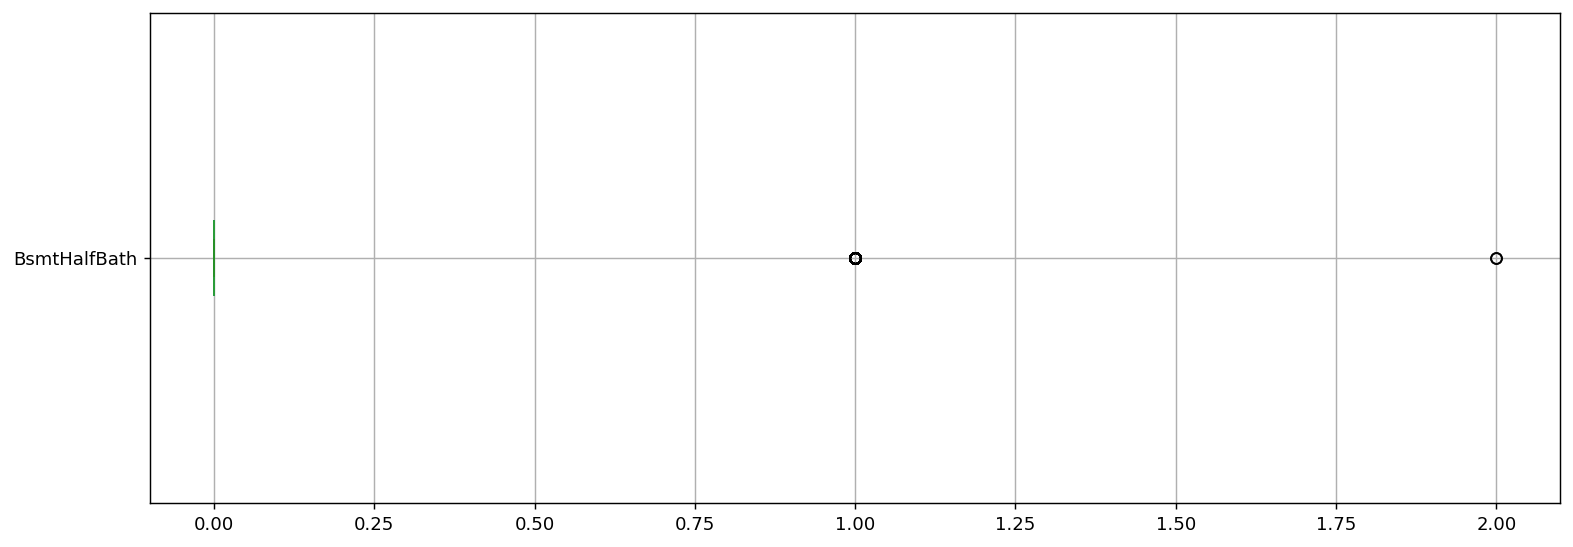

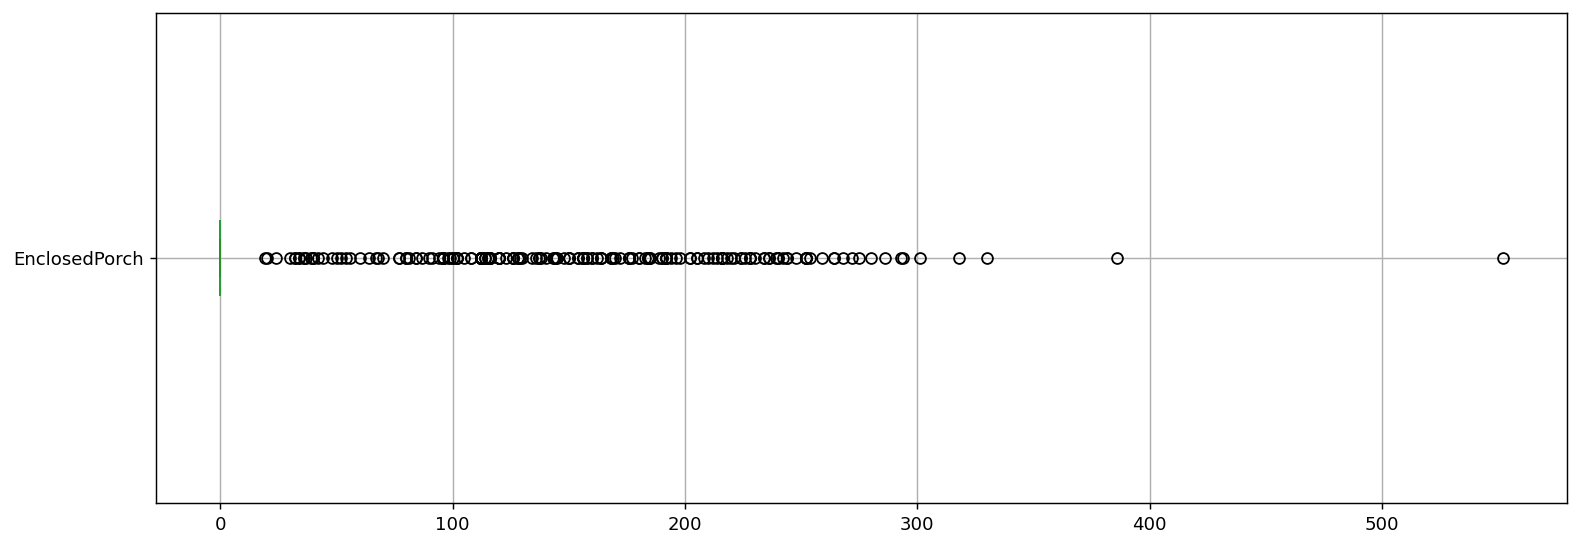

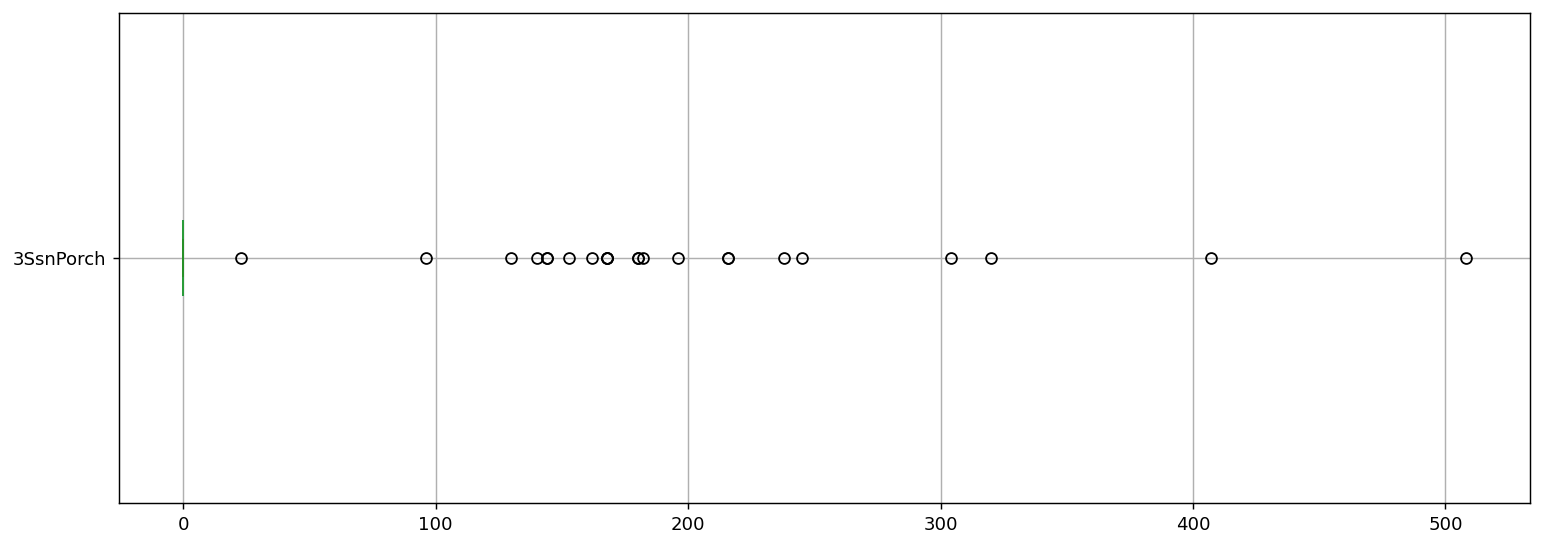

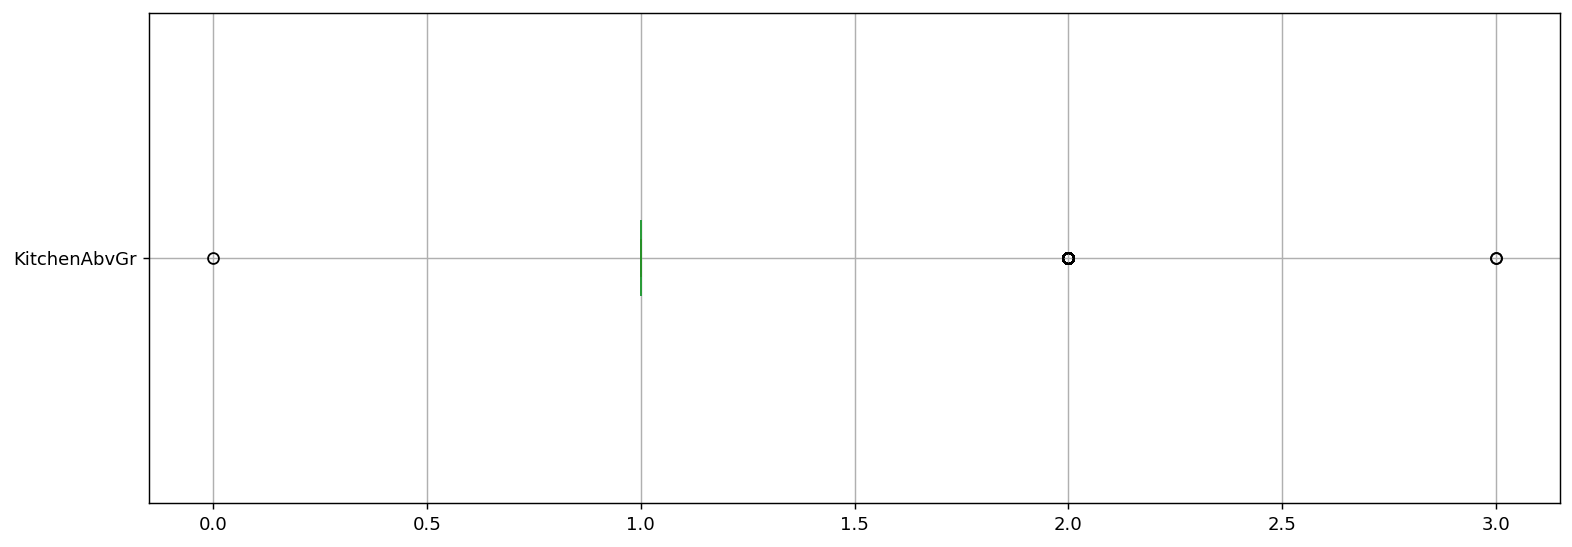

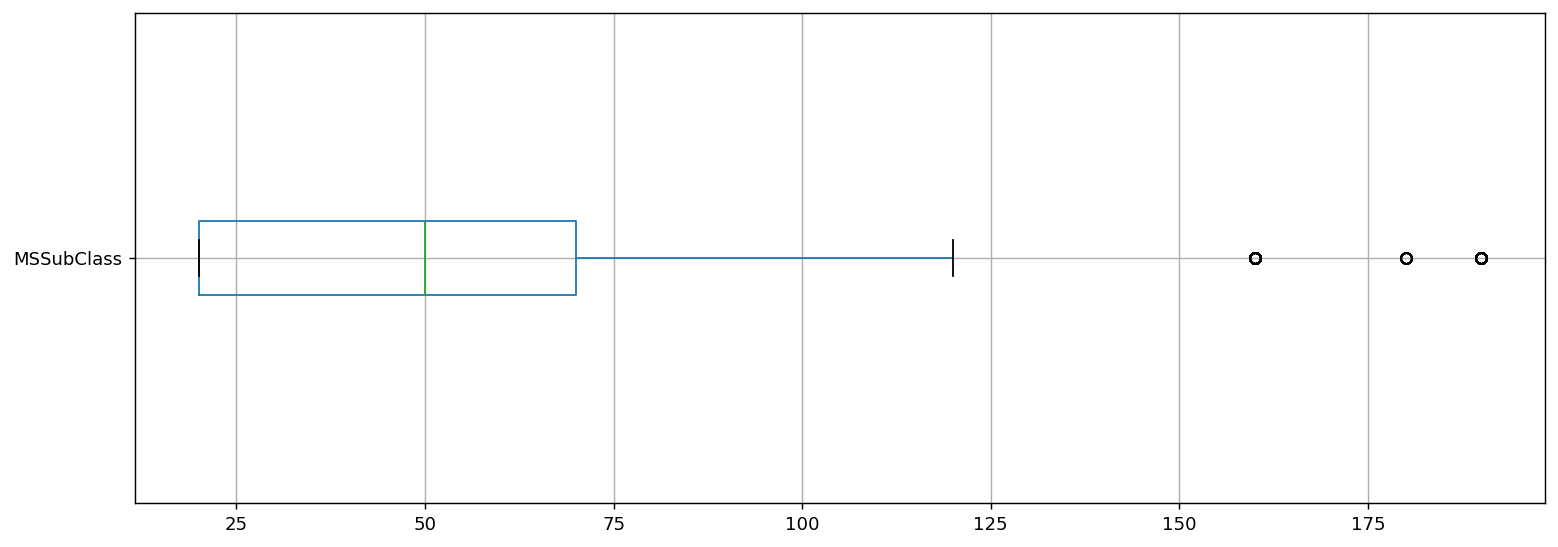

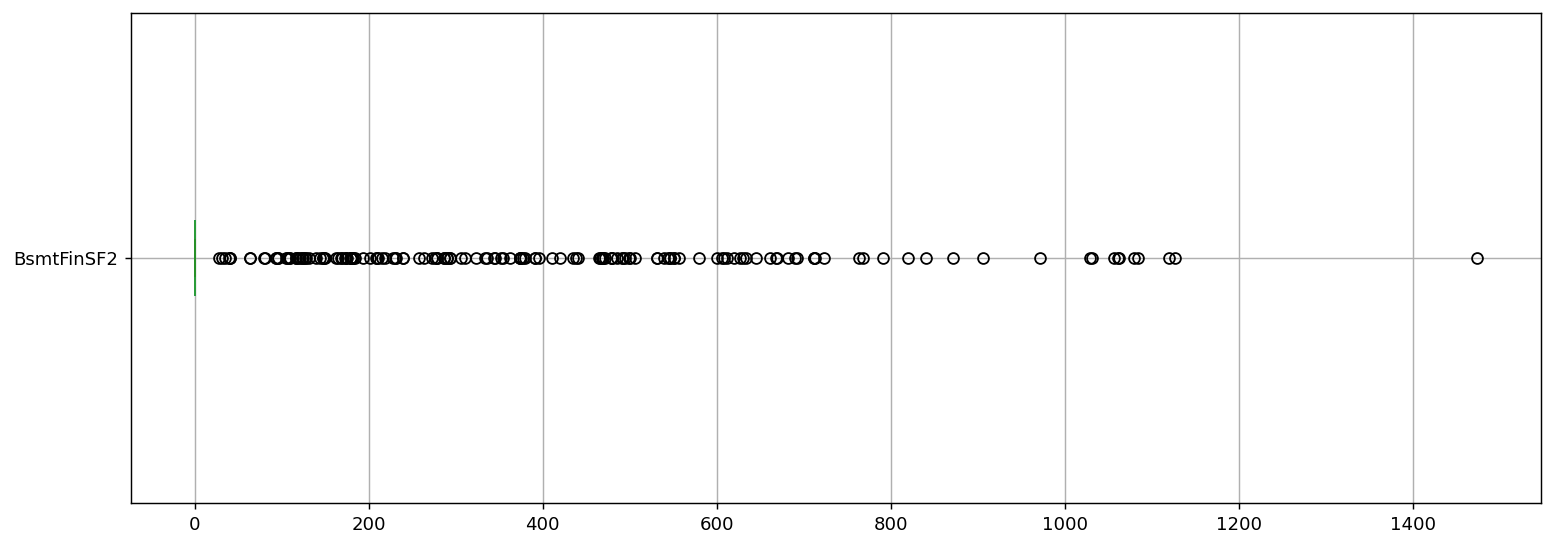

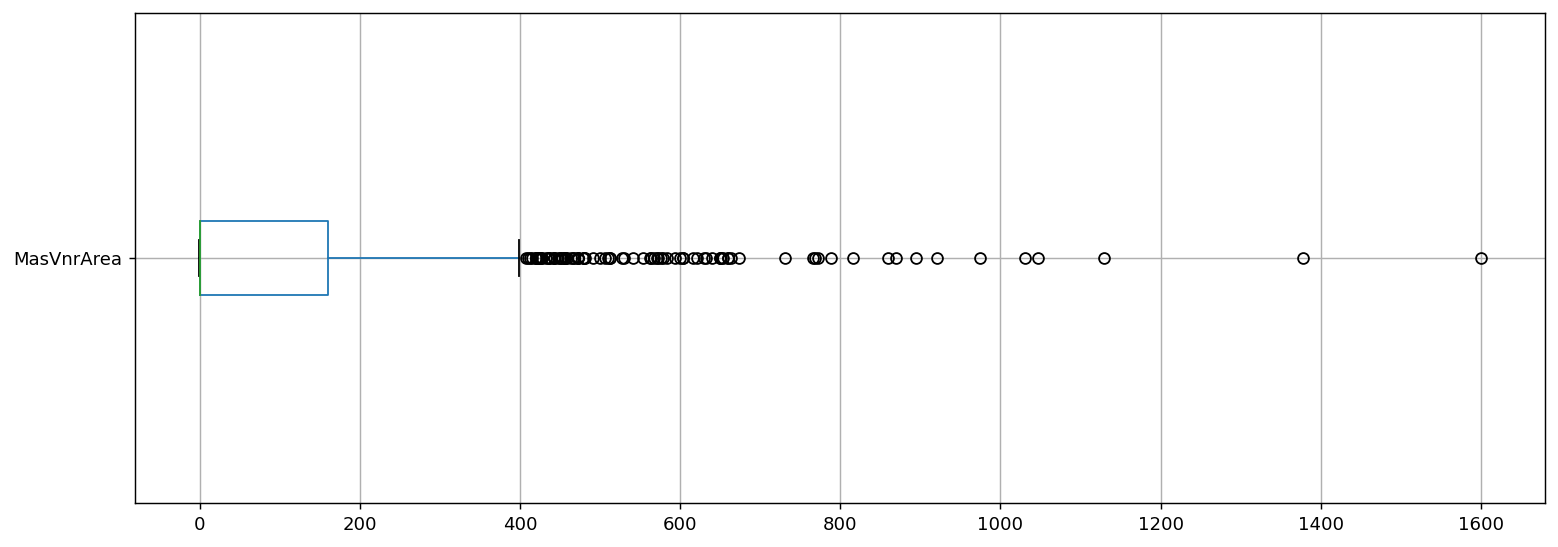

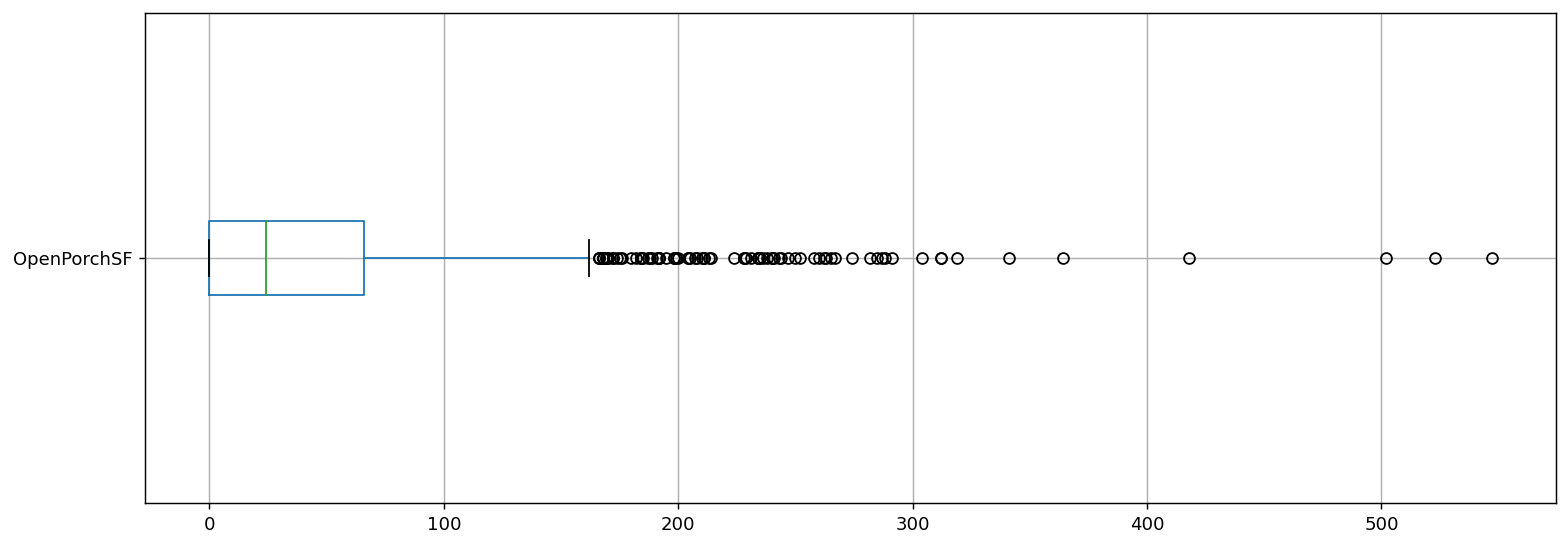

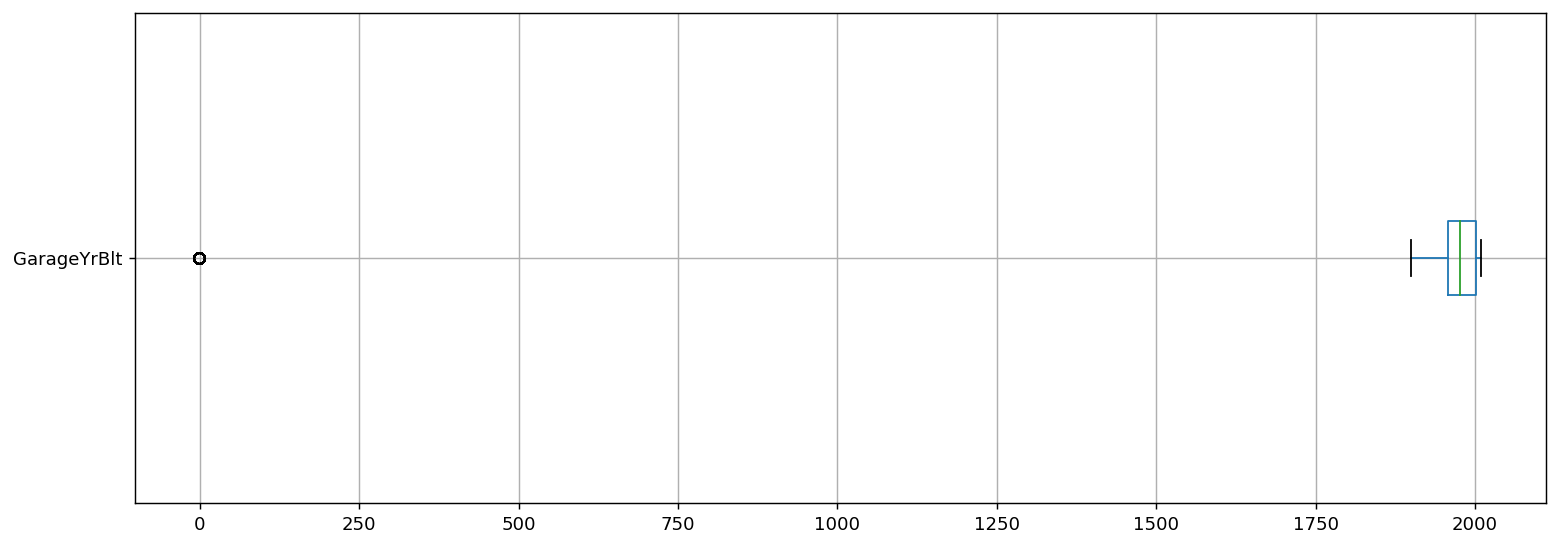

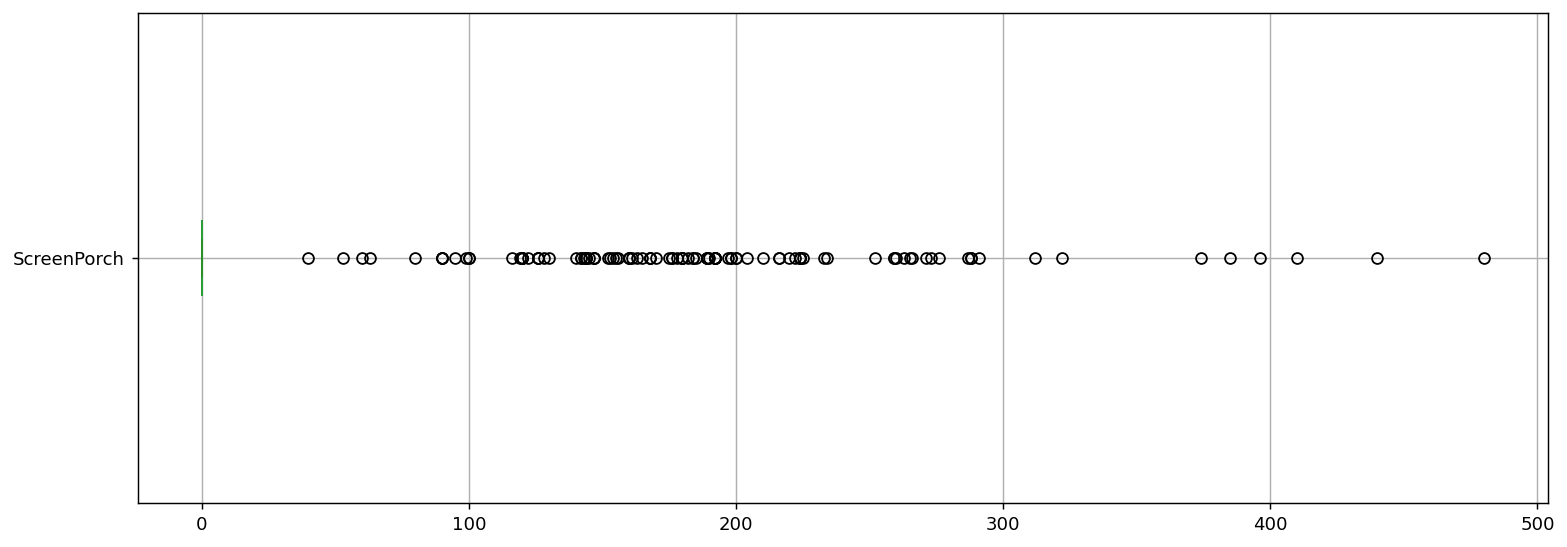

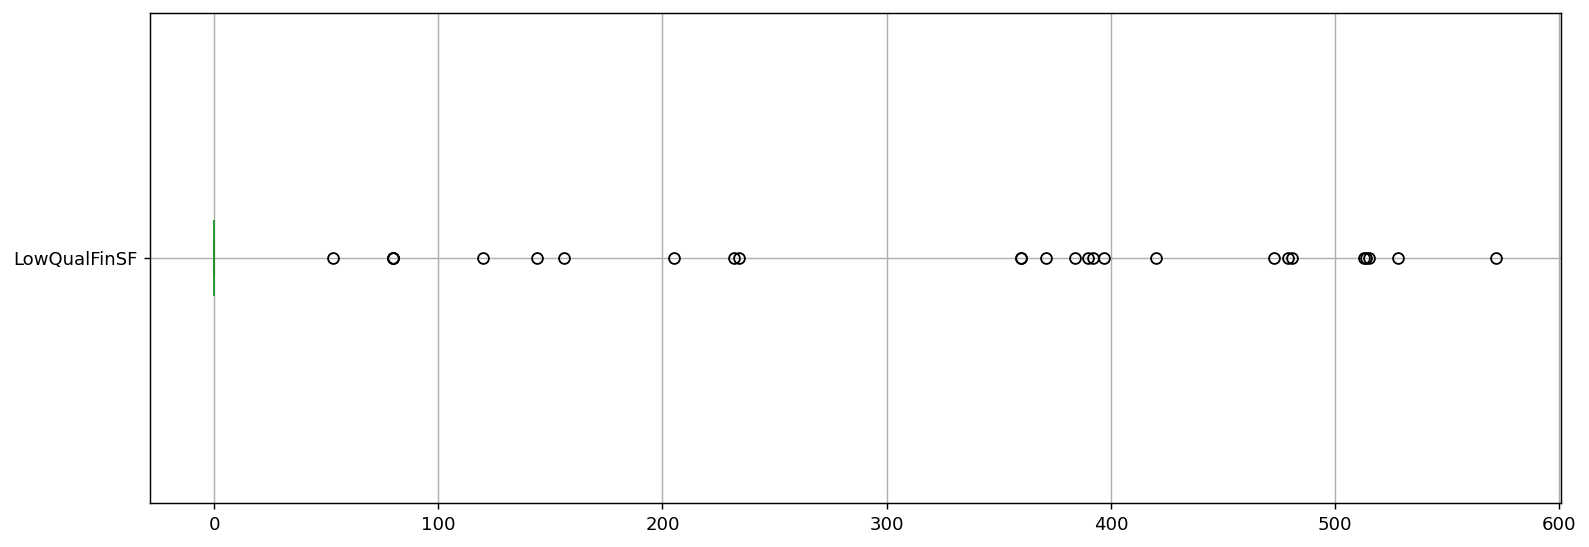

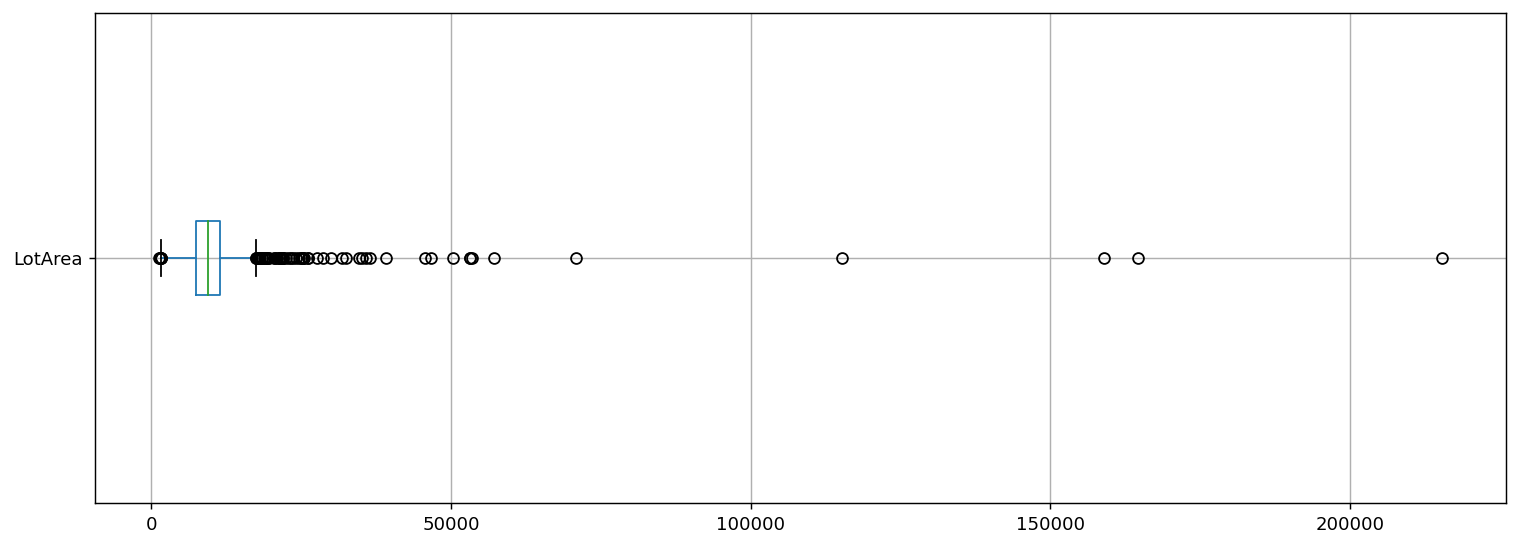

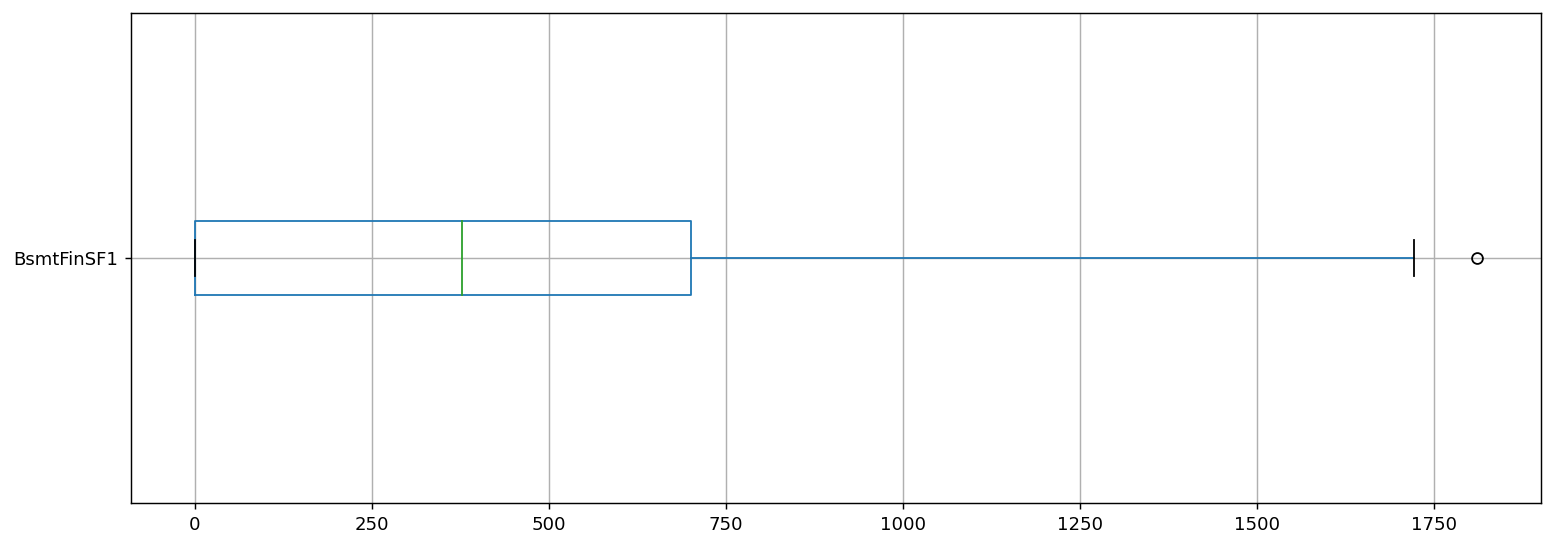

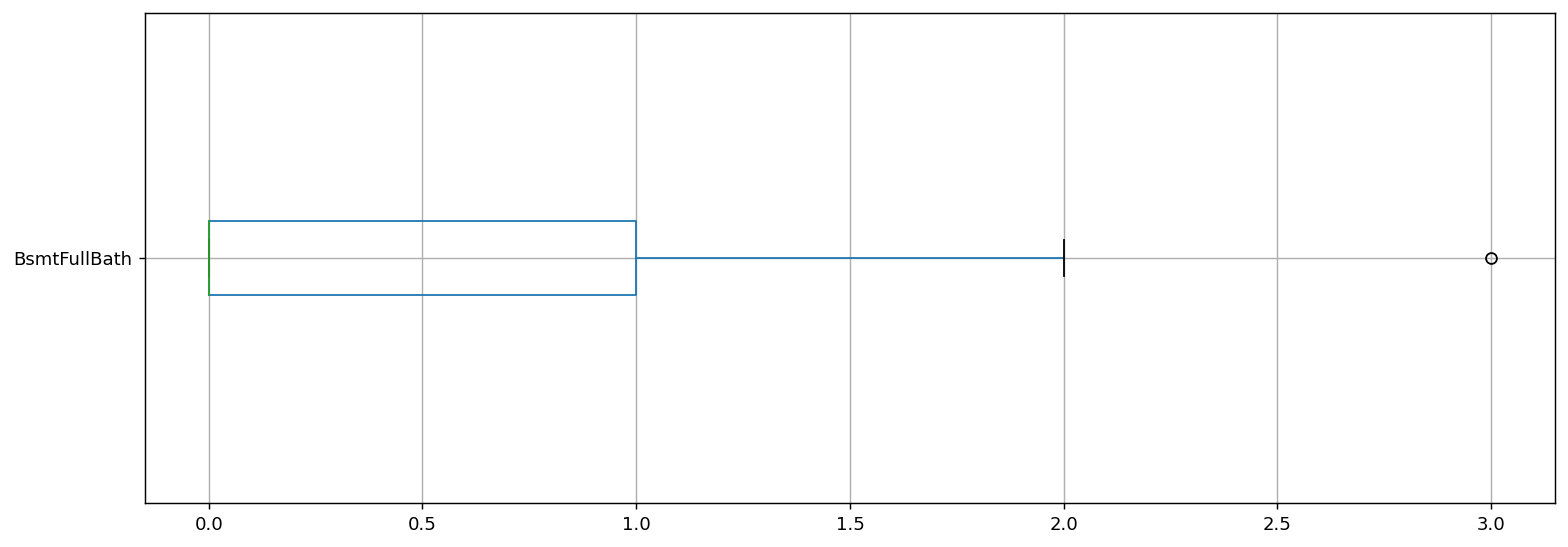

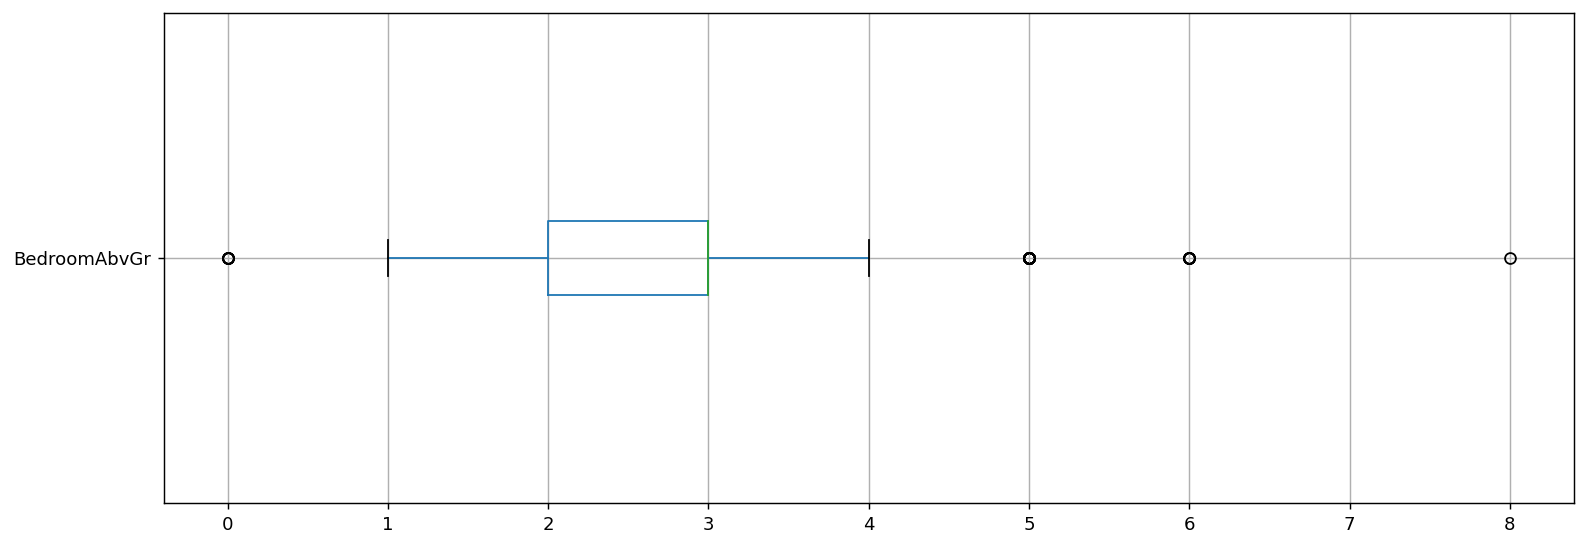

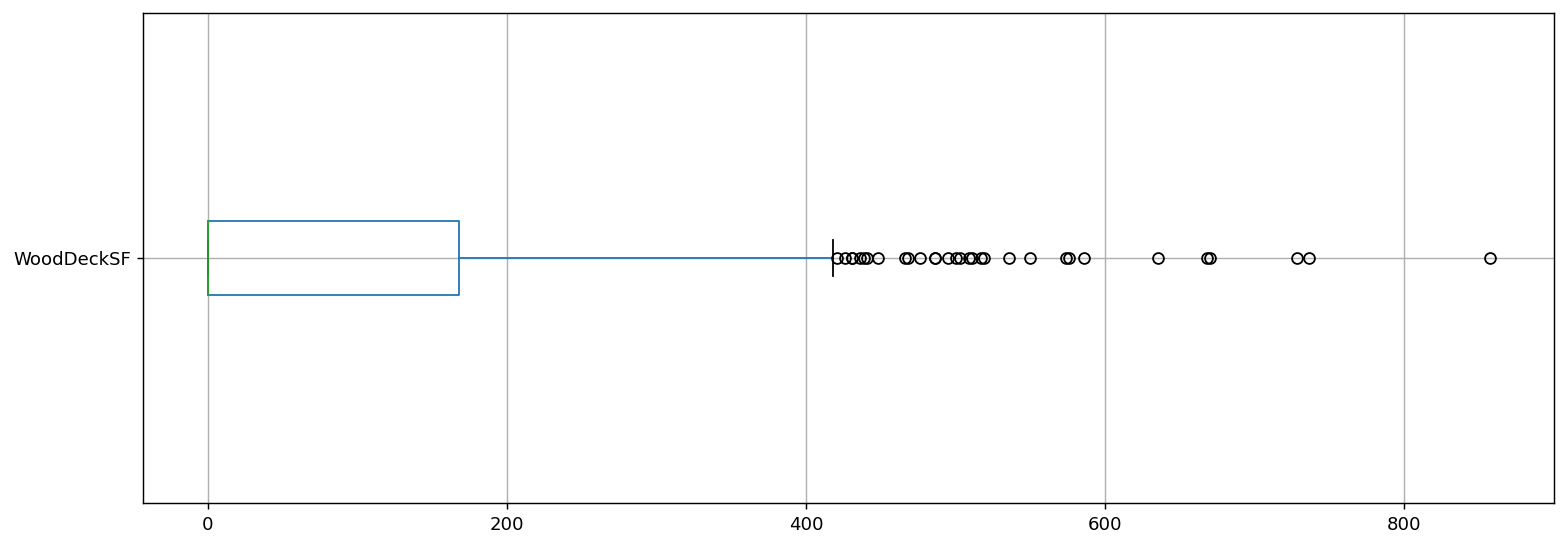

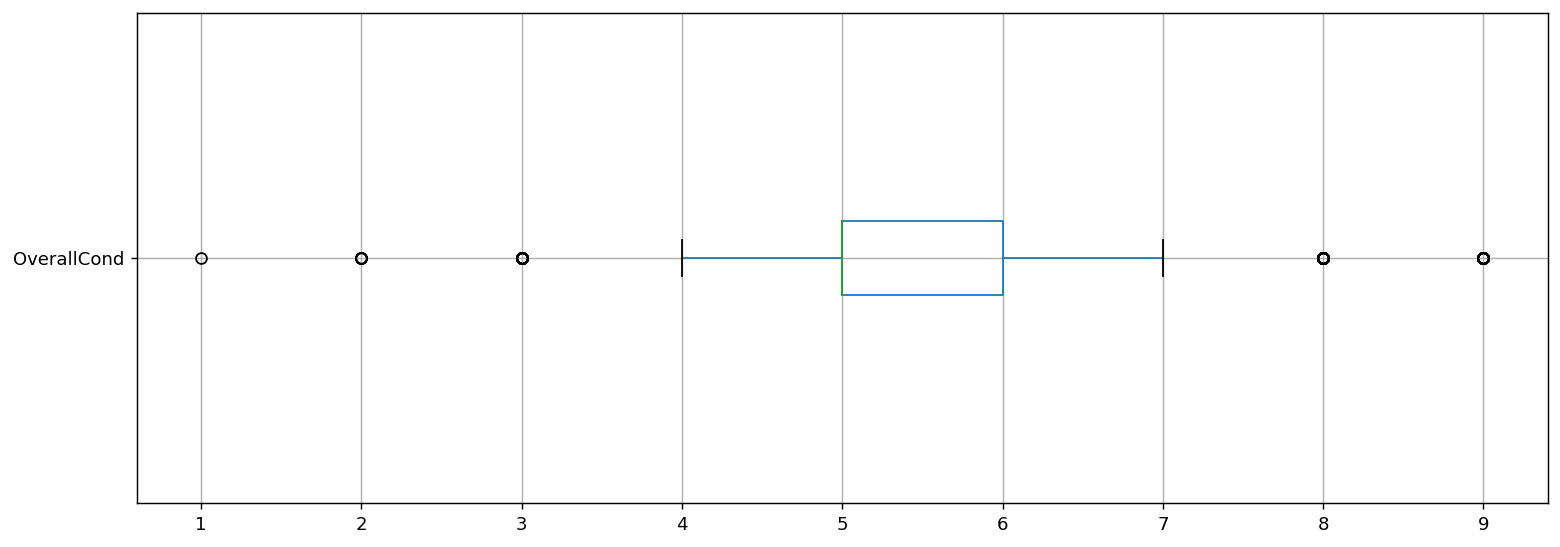

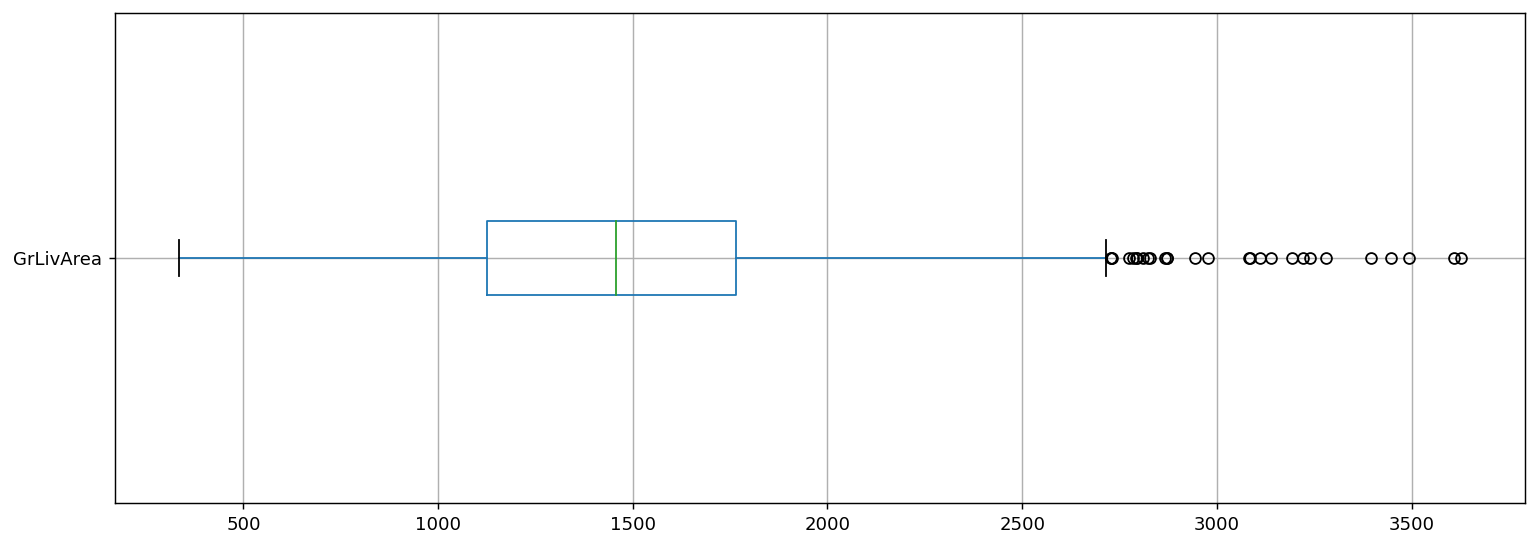

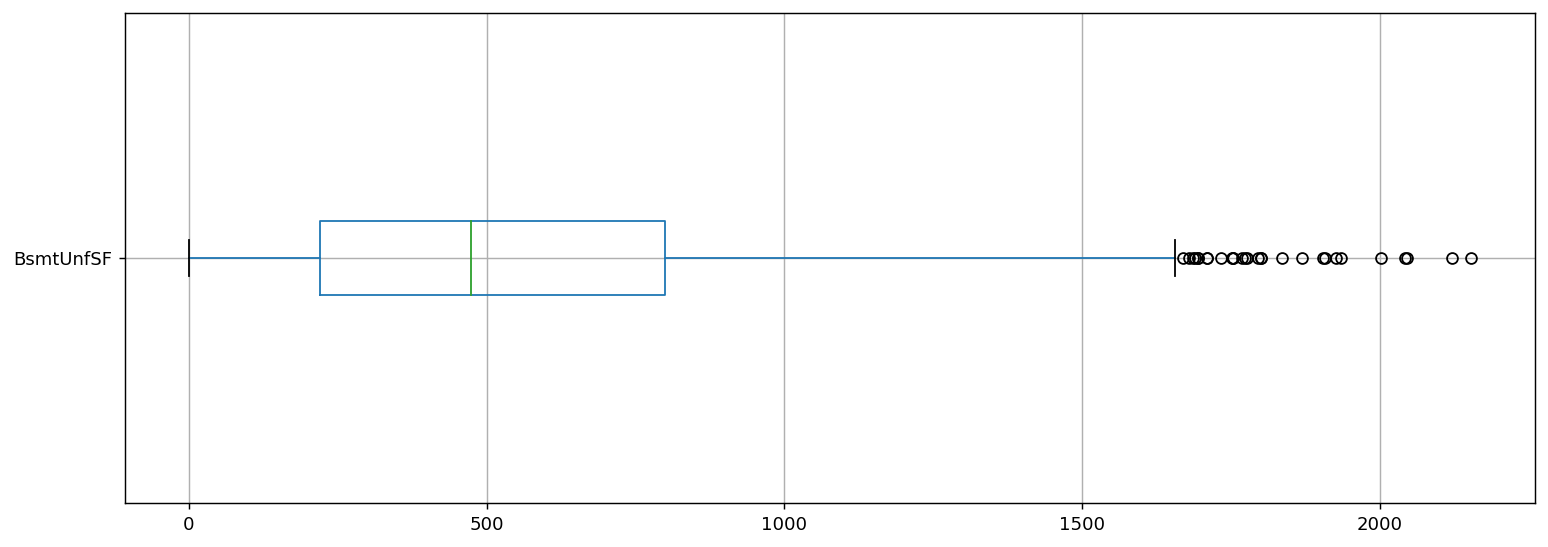

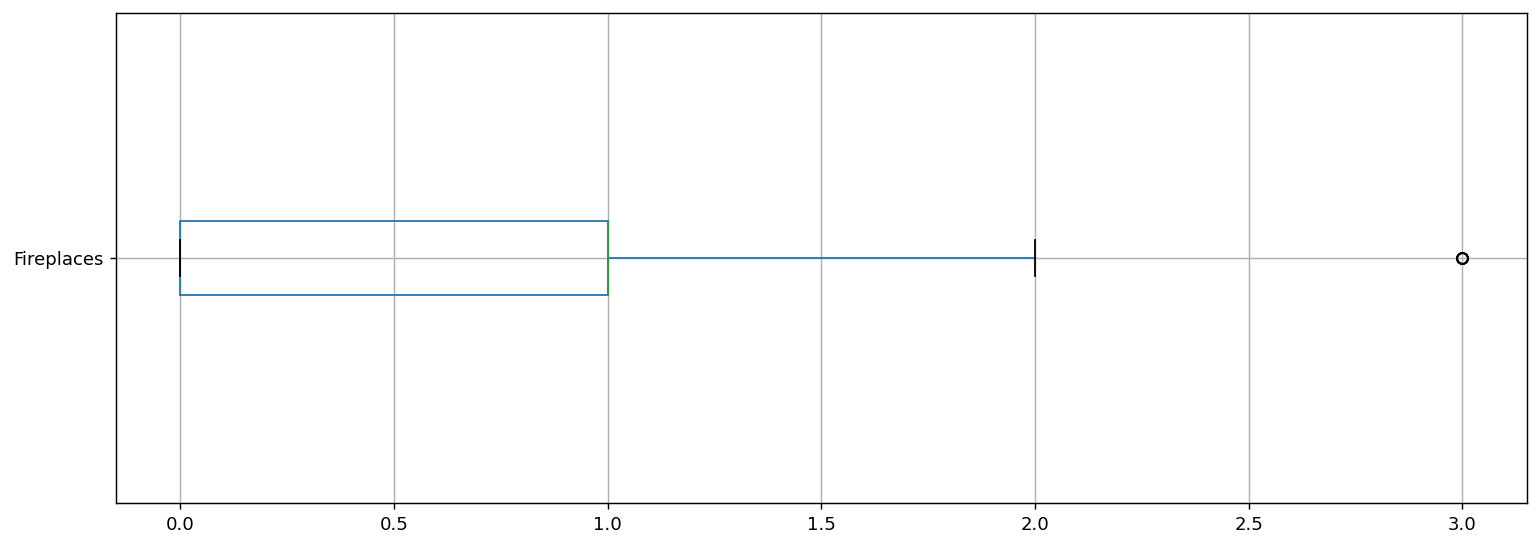

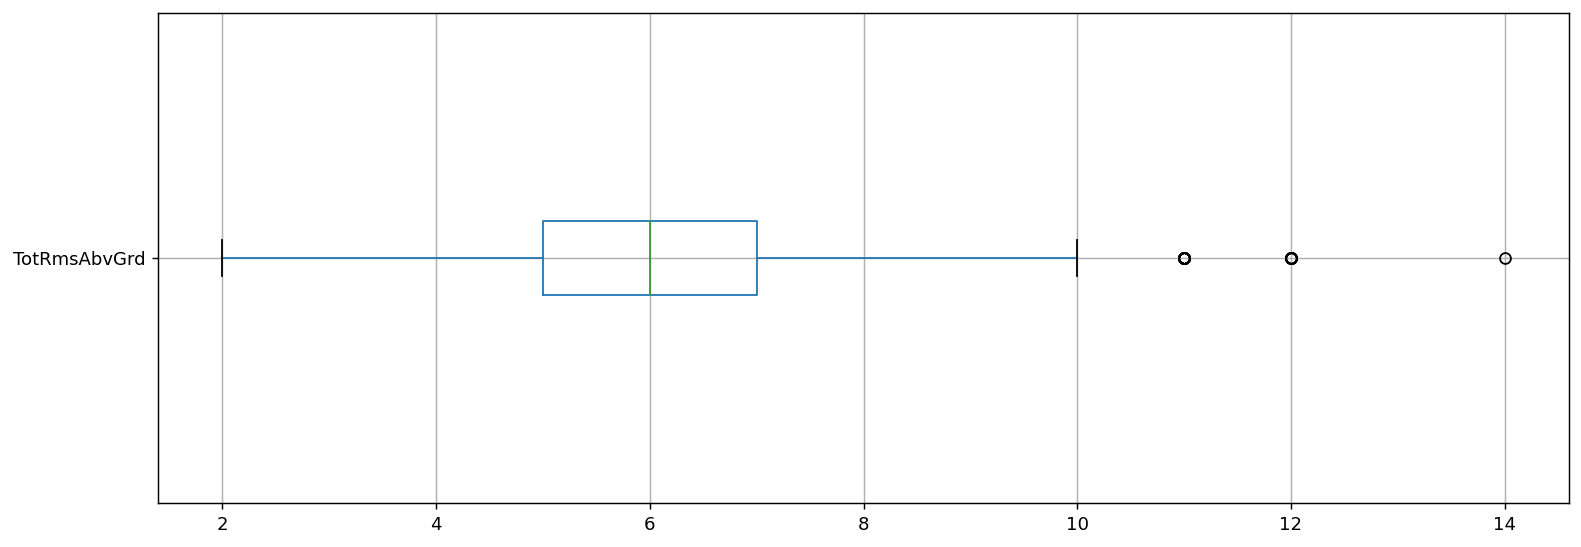

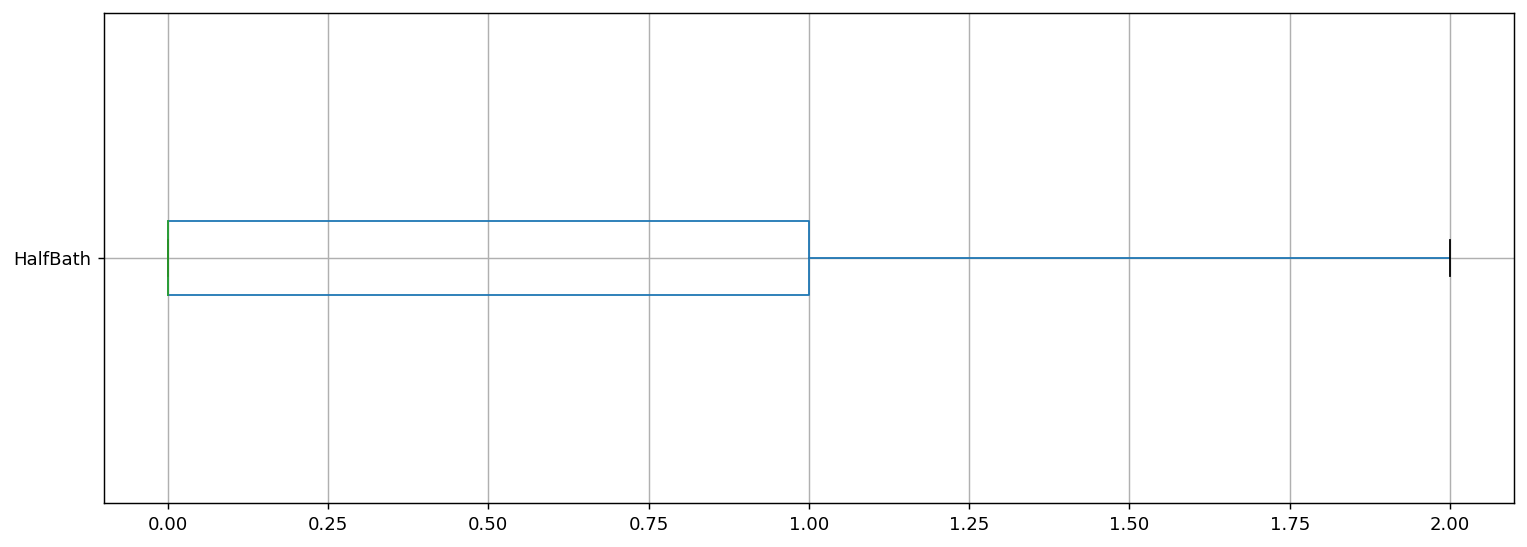

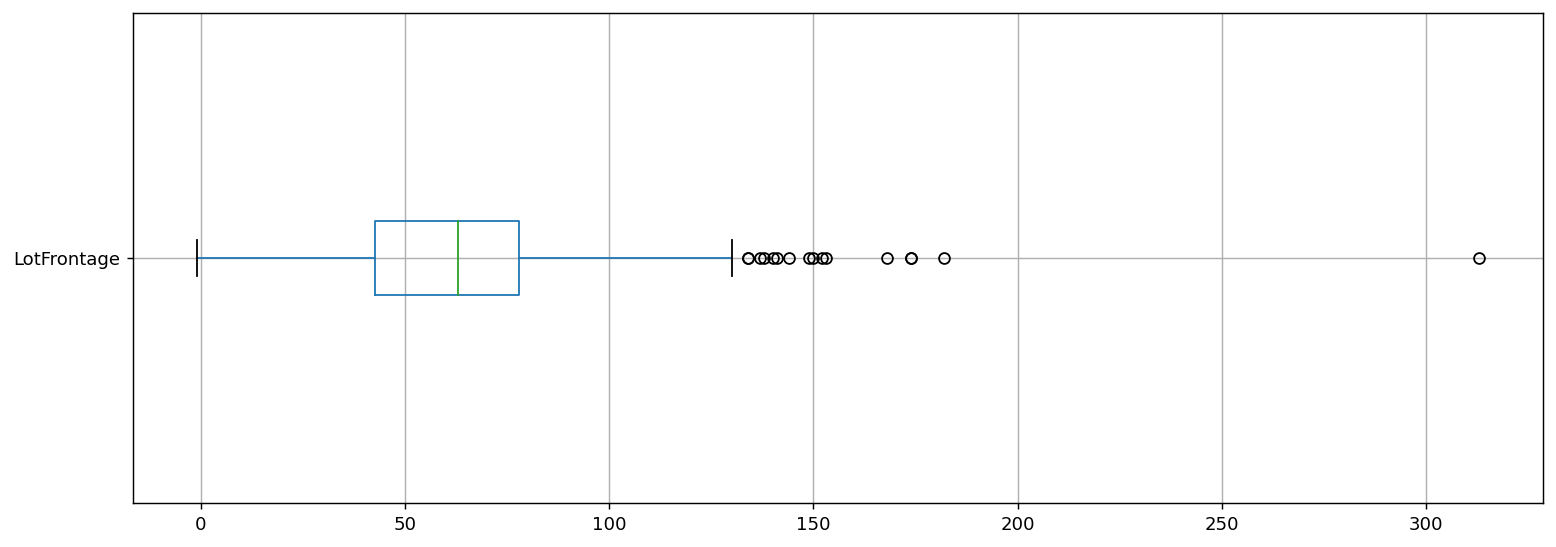

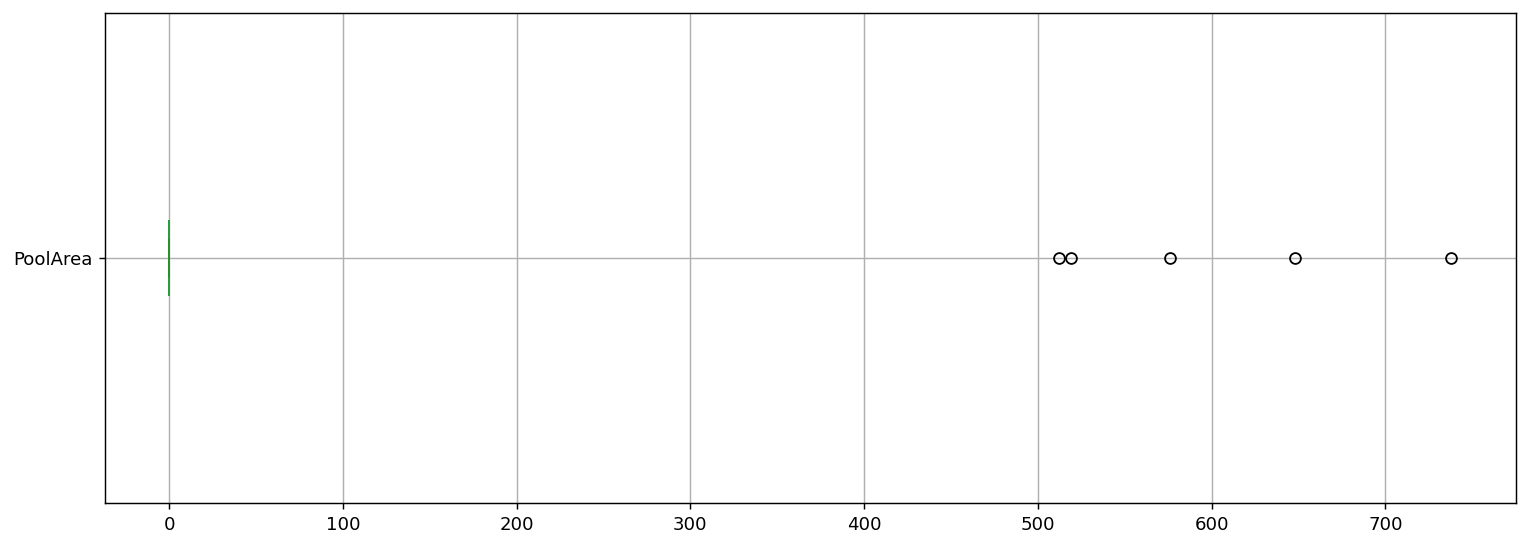

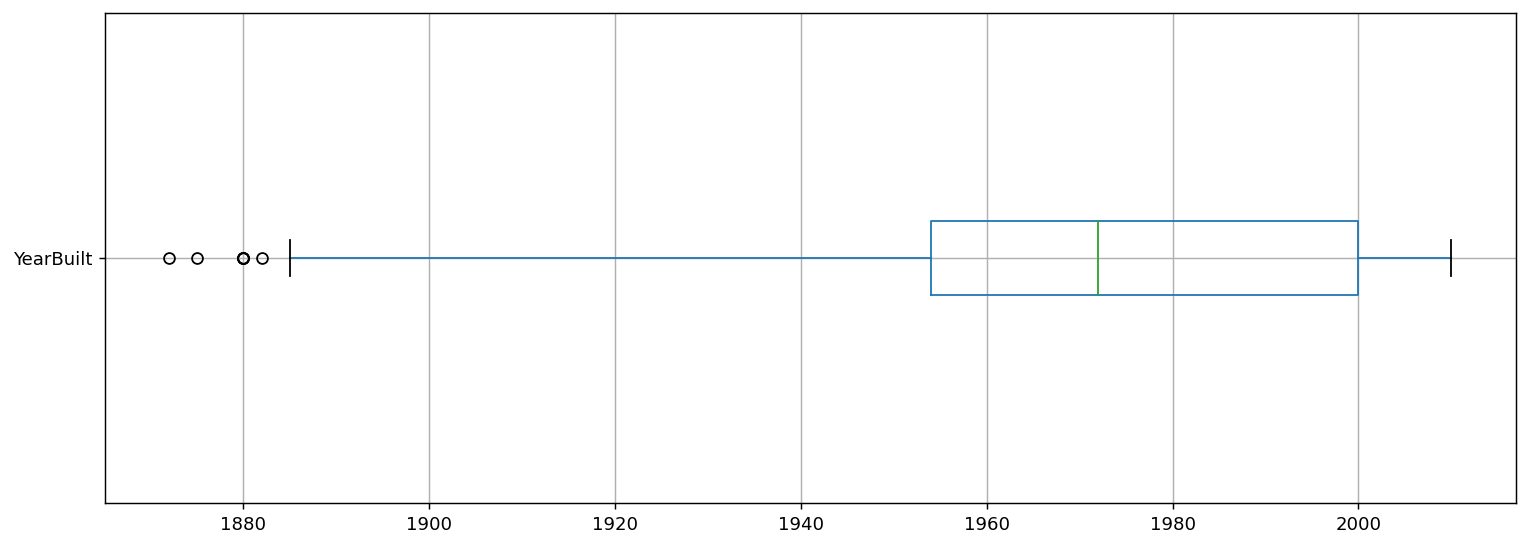

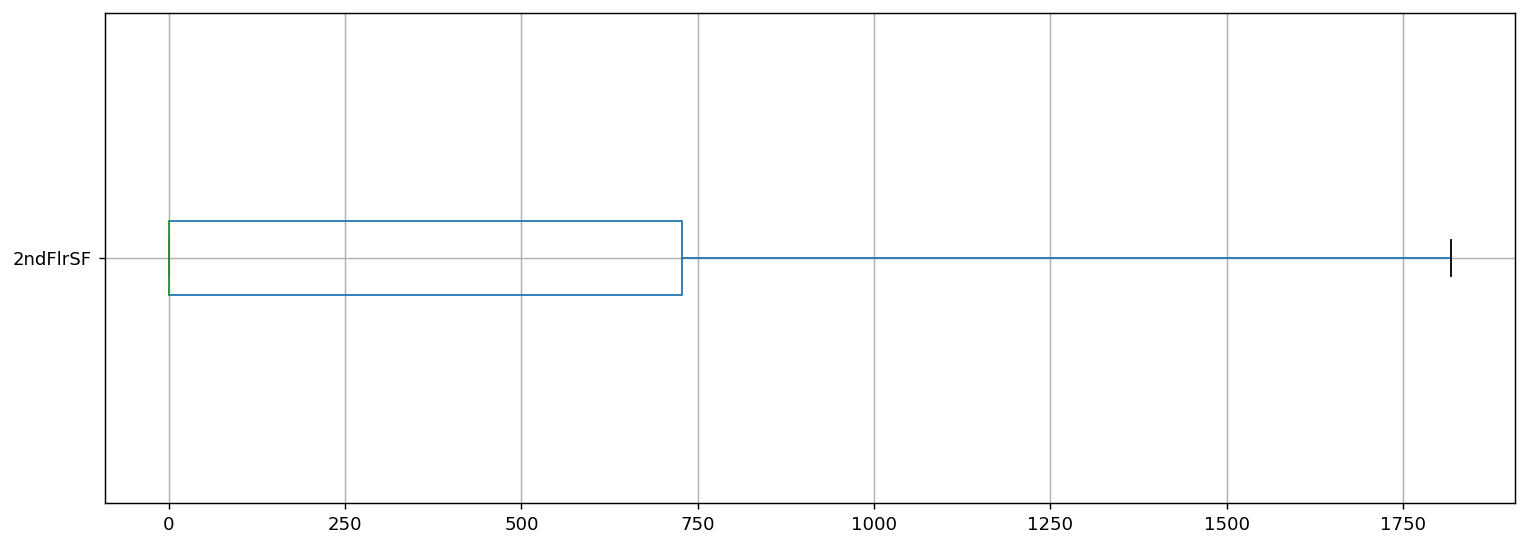

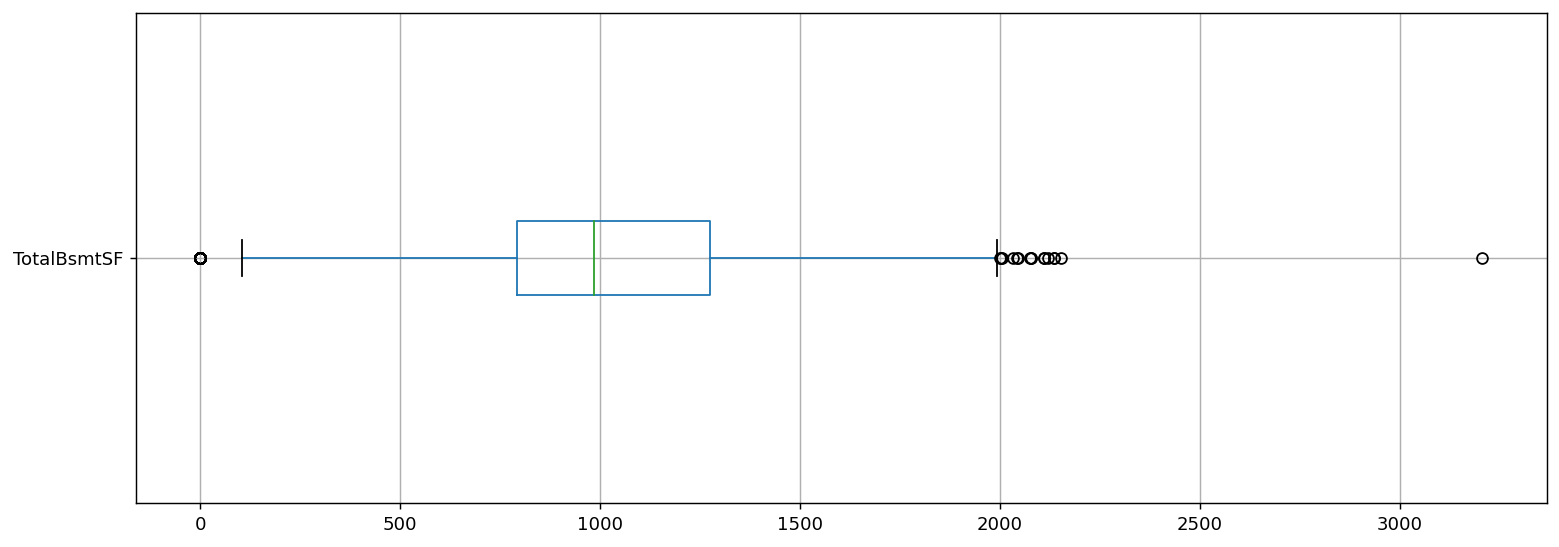

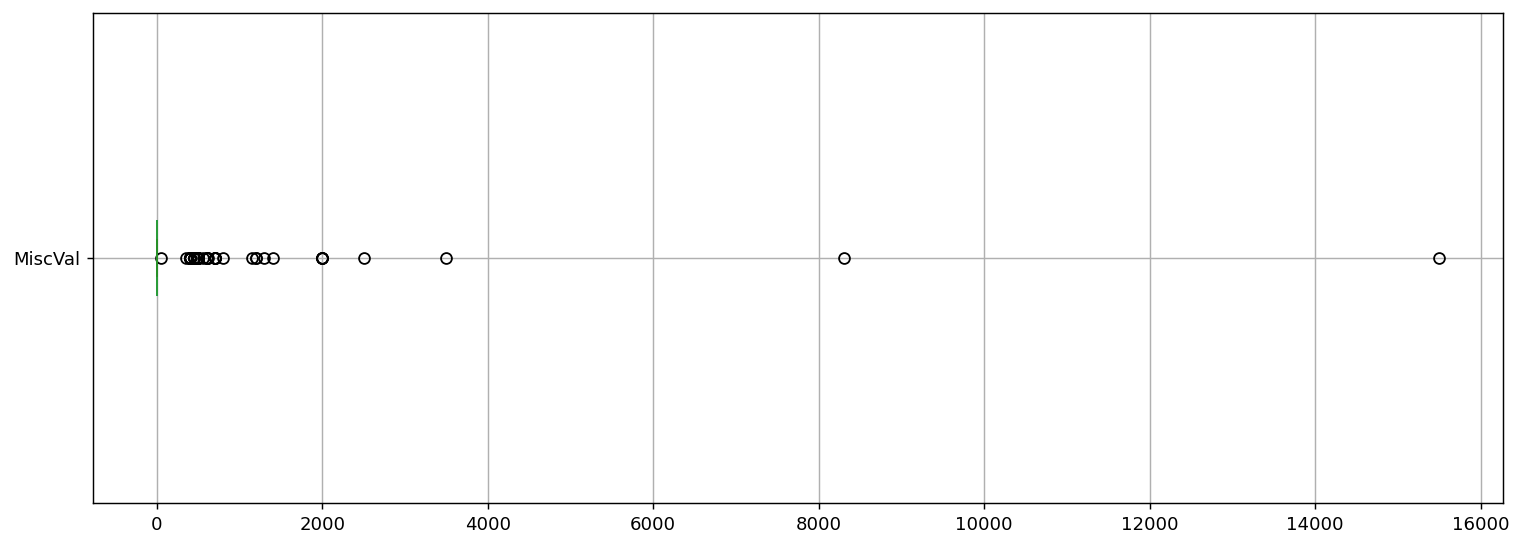

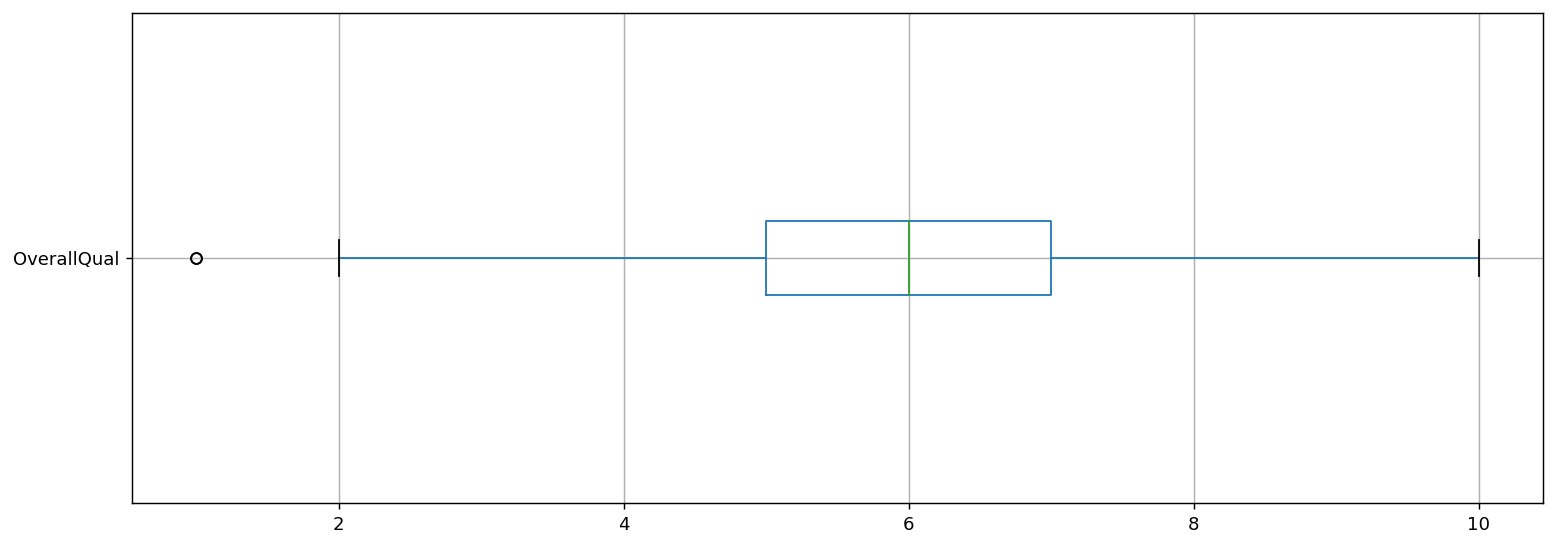

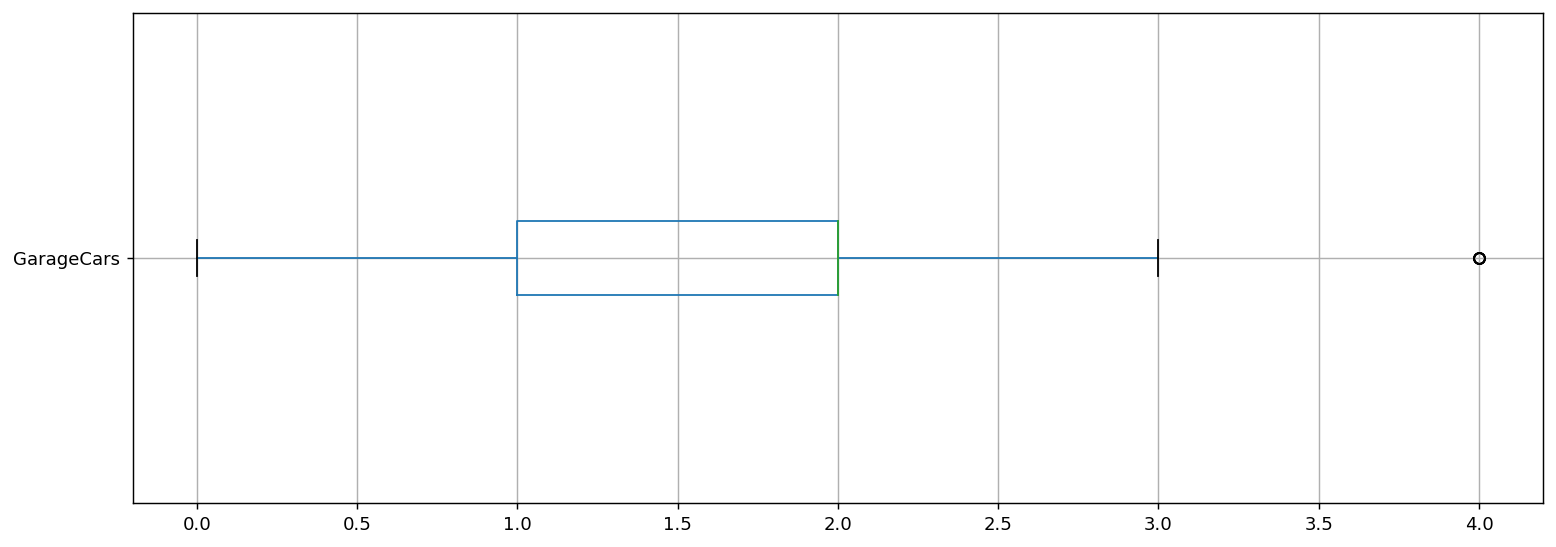

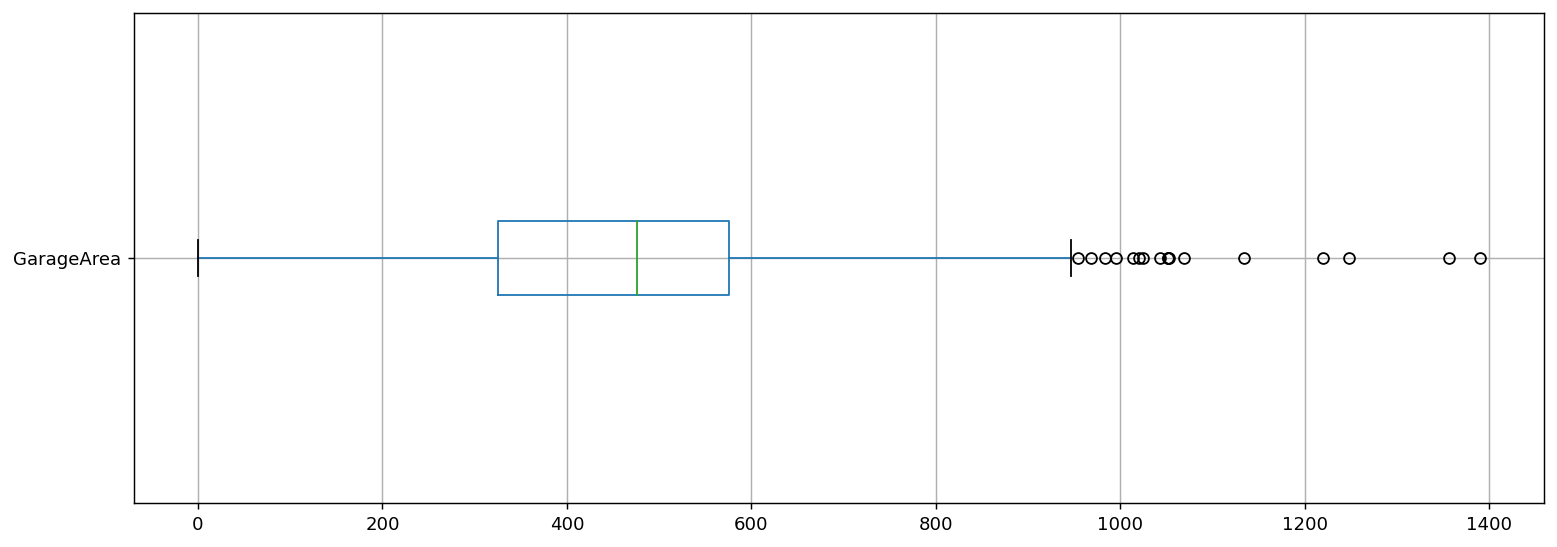

In [60]:
plt.figure(figsize=(15,14))
for col in outlier:
    plt.figure(figsize=(14,5),dpi=130)
    df.boxplot(column=col,vert=False)

In [8]:
df[np.abs(stats.zscore(df))>3]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,480,40,30,0,320,0,0,700,10,2009
7,60,-1.0,10382,7,6,1973,1973,240.0,859,32,...,484,235,204,228,0,0,0,350,11,2009
8,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,468,90,0,205,0,0,0,0,4,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,20,90.0,17217,5,5,2006,2006,0.0,0,0,...,0,36,56,0,0,0,0,0,7,2006
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,240,366,0,112,0,0,0,0,4,2010
